In [1]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt
import imutils

In [2]:
image = cv.imread("maze01.jpg",1)
orig = image.copy()

In [3]:

ratio = image.shape[0] / 500.0

In [4]:
image

array([[[116, 122, 121],
        [115, 121, 120],
        [114, 120, 119],
        ...,
        [130, 139, 143],
        [130, 139, 143],
        [131, 140, 144]],

       [[113, 119, 118],
        [113, 119, 118],
        [112, 118, 117],
        ...,
        [130, 139, 143],
        [130, 139, 143],
        [130, 139, 143]],

       [[112, 118, 117],
        [112, 118, 117],
        [113, 119, 118],
        ...,
        [129, 138, 142],
        [129, 138, 142],
        [129, 138, 142]],

       ...,

       [[142, 144, 152],
        [141, 143, 151],
        [143, 145, 153],
        ...,
        [180, 181, 191],
        [183, 184, 194],
        [179, 180, 190]],

       [[145, 147, 155],
        [144, 146, 154],
        [145, 147, 155],
        ...,
        [180, 181, 191],
        [178, 179, 189],
        [169, 170, 180]],

       [[148, 150, 158],
        [147, 149, 157],
        [147, 149, 157],
        ...,
        [174, 175, 185],
        [168, 169, 179],
        [156, 157, 167]]

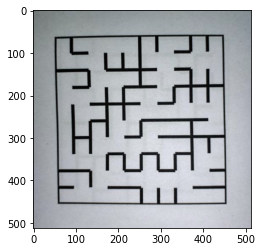

In [5]:
plt.imshow(image)
plt.show()

In [6]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

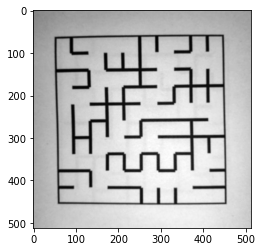

In [7]:
gray = cv.GaussianBlur(gray, (3,3), 2)
plt.imshow(gray)
imgplot1 = plt.imshow(gray, cmap='gray')



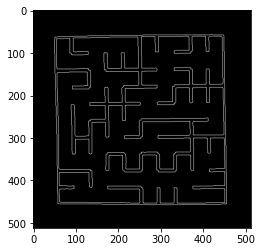

In [8]:
edged = cv.Canny(gray, 30, 200)

plt.imshow(edged)
imgplot = plt.imshow(edged, cmap='gray')

In [9]:
cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
cnts


([array([[[337,  62]],
  
         [[338,  61]],
  
         [[339,  61]],
  
         ...,
  
         [[294,  98]],
  
         [[294,  63]],
  
         [[295,  62]]], dtype=int32),
  array([[[338,  61]],
  
         [[337,  62]],
  
         [[294,  62]],
  
         ...,
  
         [[352,  62]],
  
         [[340,  62]],
  
         [[339,  61]]], dtype=int32),
  array([[[380,  58]],
  
         [[381,  57]],
  
         [[382,  57]],
  
         [[383,  58]],
  
         [[398,  58]],
  
         [[399,  57]],
  
         [[400,  57]],
  
         [[401,  58]],
  
         [[414,  58]],
  
         [[415,  57]],
  
         [[422,  57]],
  
         [[423,  58]],
  
         [[446,  58]],
  
         [[448,  60]],
  
         [[448,  96]],
  
         [[449,  97]],
  
         [[449, 169]],
  
         [[450, 170]],
  
         [[450, 171]],
  
         [[449, 172]],
  
         [[449, 177]],
  
         [[450, 178]],
  
         [[450, 221]],
  
         [[451, 222]],
  
      

In [10]:
cnts = imutils.grab_contours(cnts)
cnts


[array([[[337,  62]],
 
        [[338,  61]],
 
        [[339,  61]],
 
        ...,
 
        [[294,  98]],
 
        [[294,  63]],
 
        [[295,  62]]], dtype=int32),
 array([[[338,  61]],
 
        [[337,  62]],
 
        [[294,  62]],
 
        ...,
 
        [[352,  62]],
 
        [[340,  62]],
 
        [[339,  61]]], dtype=int32),
 array([[[380,  58]],
 
        [[381,  57]],
 
        [[382,  57]],
 
        [[383,  58]],
 
        [[398,  58]],
 
        [[399,  57]],
 
        [[400,  57]],
 
        [[401,  58]],
 
        [[414,  58]],
 
        [[415,  57]],
 
        [[422,  57]],
 
        [[423,  58]],
 
        [[446,  58]],
 
        [[448,  60]],
 
        [[448,  96]],
 
        [[449,  97]],
 
        [[449, 169]],
 
        [[450, 170]],
 
        [[450, 171]],
 
        [[449, 172]],
 
        [[449, 177]],
 
        [[450, 178]],
 
        [[450, 221]],
 
        [[451, 222]],
 
        [[450, 223]],
 
        [[451, 224]],
 
        [[451, 225]],
 
        

In [11]:
cnts = sorted(cnts, key = cv.contourArea, reverse = True)
# loop over the contours

	# show the contour (outline) of the piece of paper


In [12]:
len1 = len(cnts)
len1


4

In [13]:
for c in cnts:
# approximate the contour
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.02 * peri, True)
    print(len(approx))
# if our approximated contour has four points, then we
# can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break


4


In [14]:
print("STEP 2: Find contours of paper")
print(screenCnt)
cv.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)

STEP 2: Find contours of paper
[[[447  58]]

 [[ 51  63]]

 [[ 58 454]]

 [[454 454]]]


array([[[116, 122, 121],
        [115, 121, 120],
        [114, 120, 119],
        ...,
        [130, 139, 143],
        [130, 139, 143],
        [131, 140, 144]],

       [[113, 119, 118],
        [113, 119, 118],
        [112, 118, 117],
        ...,
        [130, 139, 143],
        [130, 139, 143],
        [130, 139, 143]],

       [[112, 118, 117],
        [112, 118, 117],
        [113, 119, 118],
        ...,
        [129, 138, 142],
        [129, 138, 142],
        [129, 138, 142]],

       ...,

       [[142, 144, 152],
        [141, 143, 151],
        [143, 145, 153],
        ...,
        [180, 181, 191],
        [183, 184, 194],
        [179, 180, 190]],

       [[145, 147, 155],
        [144, 146, 154],
        [145, 147, 155],
        ...,
        [180, 181, 191],
        [178, 179, 189],
        [169, 170, 180]],

       [[148, 150, 158],
        [147, 149, 157],
        [147, 149, 157],
        ...,
        [174, 175, 185],
        [168, 169, 179],
        [156, 157, 167]]

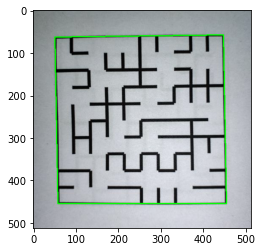

In [15]:
plt.imshow(image)
plt.show()

In [16]:
pts = screenCnt.reshape(4, 2)
print(pts)

[[447  58]
 [ 51  63]
 [ 58 454]
 [454 454]]


In [17]:
rect = np.zeros((4, 2), dtype = "float32")
# the top-left point will have the smallest sum, whereas
# the bottom-right point will have the largest sum
s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]
# now, compute the difference between the points, the
# top-right point will have the smallest difference,
# whereas the bottom-left will have the largest difference
diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
# return the ordered coordinates
print(rect)

[[ 51.  63.]
 [447.  58.]
 [454. 454.]
 [ 58. 454.]]


In [18]:
(tl, tr, br, bl) = rect
# compute the width of the new image, which will be the
# maximum distance between bottom-right and bottom-left
# x-coordiates or the top-right and top-left x-coordinates
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))
# compute the height of the new image, which will be the
# maximum distance between the top-right and bottom-right
# y-coordinates or the top-left and bottom-left y-coordinates
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))
print(f"max width{maxWidth} and max height = {maxHeight}")
# now that we have the dimensions of the new image, construct
# the set of destination points to obtain a "birds eye view",
# (i.e. top-down view) of the image, again specifying points
# in the top-left, top-right, bottom-right, and bottom-left
# order
dst = np.array([
[0, 0],
[maxWidth - 1, 0],
[maxWidth - 1, maxHeight - 1],
[0, maxHeight - 1]], dtype = "float32")
print(dst)

max width396 and max height = 396
[[  0.   0.]
 [395.   0.]
 [395. 395.]
 [  0. 395.]]


In [19]:
M = cv.getPerspectiveTransform(rect, dst)
warped = cv.warpPerspective(orig, M, (maxWidth, maxHeight))

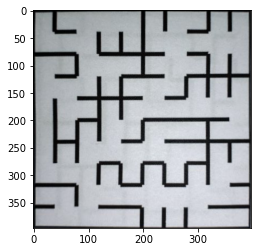

In [20]:
plt.imshow(warped)
plt.show()

In [21]:
gray =  warped
gray = cv.GaussianBlur(gray,(5,5),0)

In [22]:
ret2,thresh2 = cv.threshold(gray,100,255,cv.THRESH_BINARY)

# changes can be done

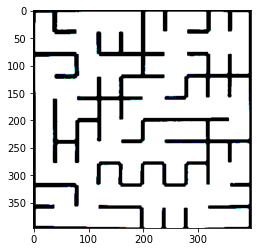

In [23]:
plt.imshow(thresh2)
plt.show()

In [24]:
image = cv.copyMakeBorder(thresh2,5,5,5,5, cv.BORDER_CONSTANT,value=[0,0,0]) 
resized_image = cv.resize(image, (400, 400)) 
resized_image.shape

(400, 400, 3)

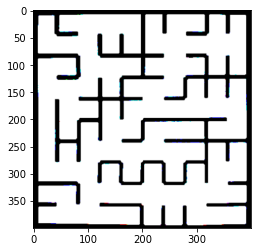

40
40


In [25]:
plt.imshow(resized_image)
cv.imwrite("borderjupyert.jpg",resized_image)
plt.show()
jincrement = resized_image.shape[0]//10
iincrement = resized_image.shape[1]//10
print(jincrement)
print(iincrement)

0 0
False


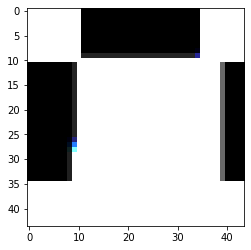

0 40
False


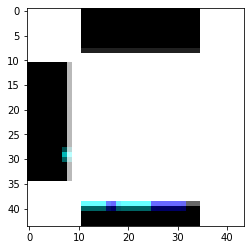

0 80
False


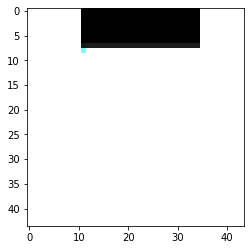

0 120
False


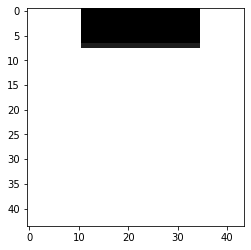

0 160
False


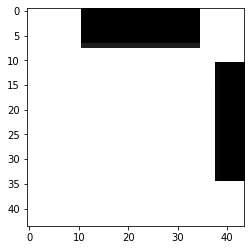

0 200
False


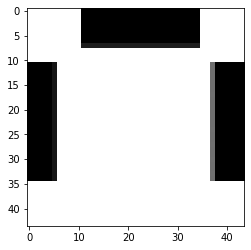

0 240
False


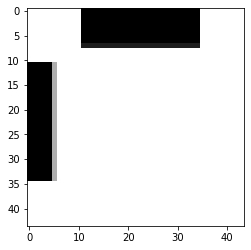

0 280
False


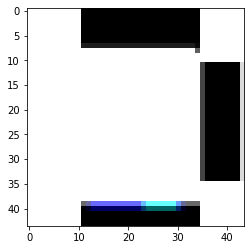

0 320
False


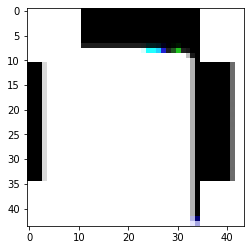

0 360
False


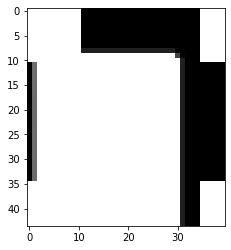

40 0
True


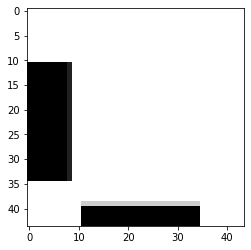

40 40
False


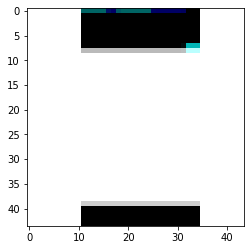

40 80
True


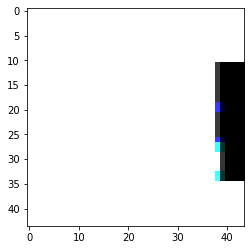

40 120
True


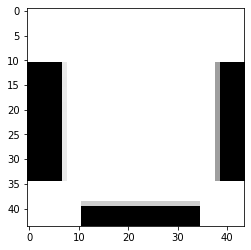

40 160
True


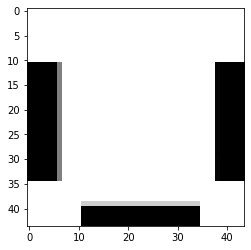

40 200
True


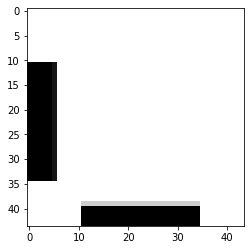

40 240
True


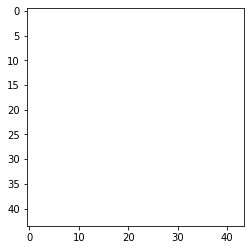

40 280
False


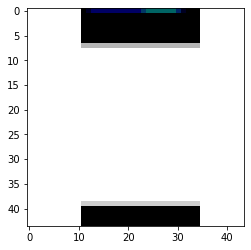

40 320
True


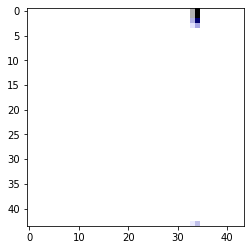

40 360
True


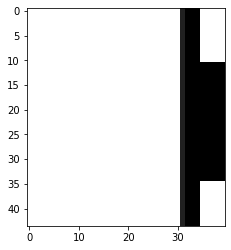

80 0
False


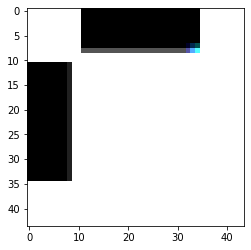

80 40
False


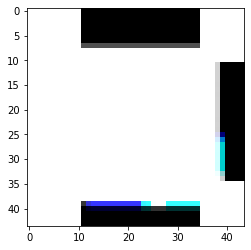

80 80
True


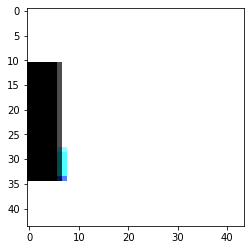

80 120
False


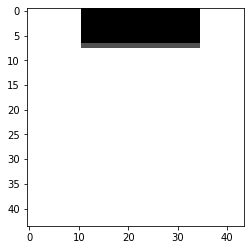

80 160
False


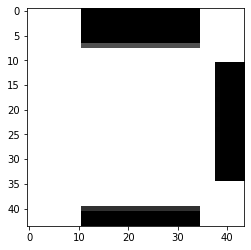

80 200
False


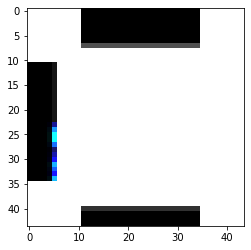

80 240
True


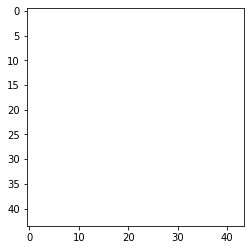

80 280
False


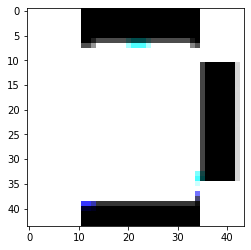

80 320
True


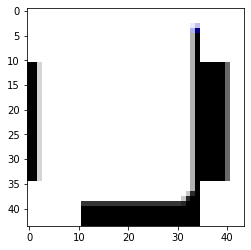

80 360
True


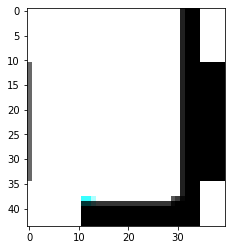

120 0
True


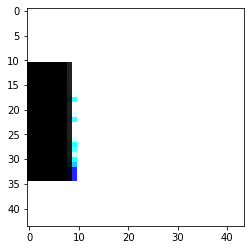

120 40
False


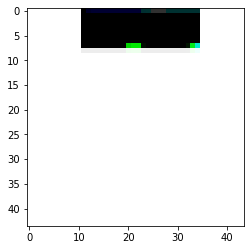

120 80
True


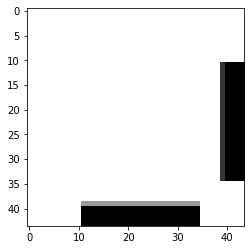

120 120
True


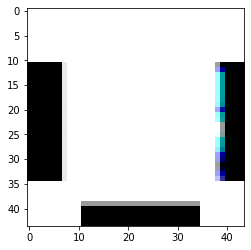

120 160
True


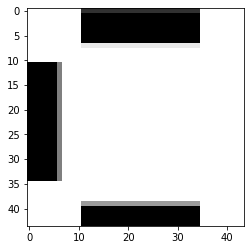

120 200
True


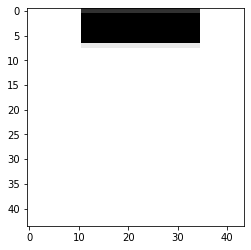

120 240
True


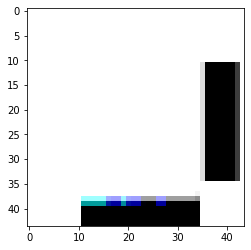

120 280
False


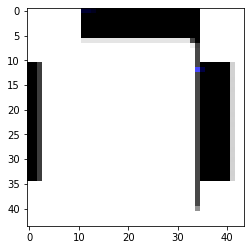

120 320
False


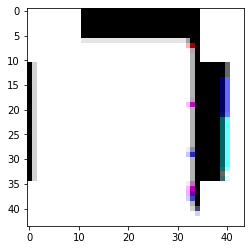

120 360
False


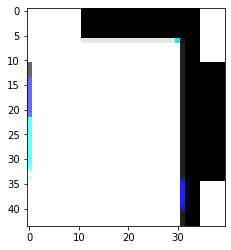

160 0
True


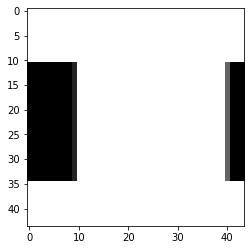

160 40
True


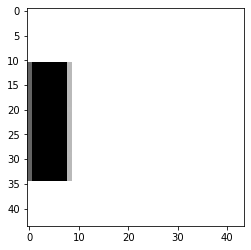

160 80
False


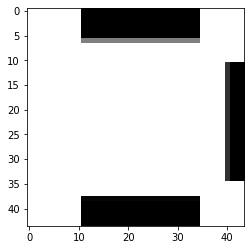

160 120
False


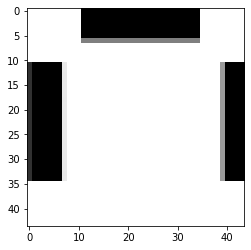

160 160
False


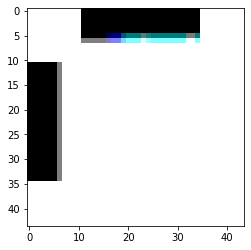

160 200
True


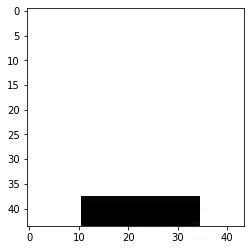

160 240
False


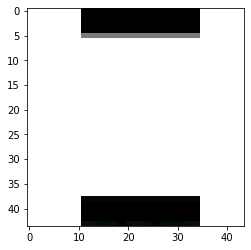

160 280
True


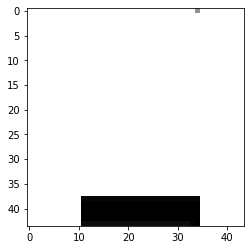

160 320
True


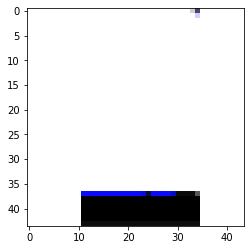

160 360
True


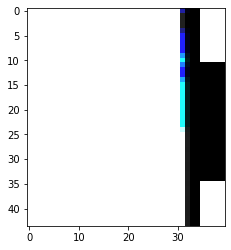

200 0
True


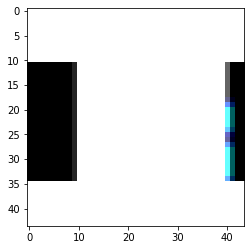

200 40
True


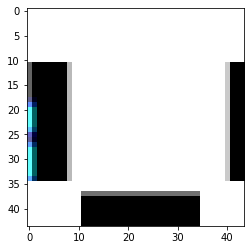

200 80
False


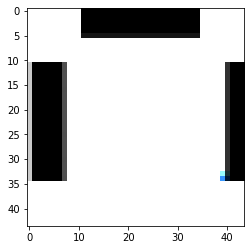

200 120
True


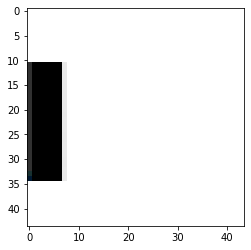

200 160
True


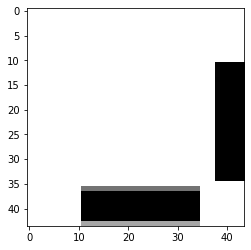

200 200
False


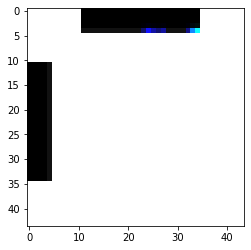

200 240
False


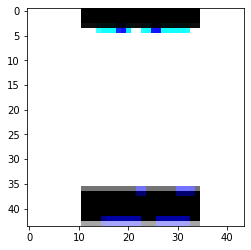

200 280
False


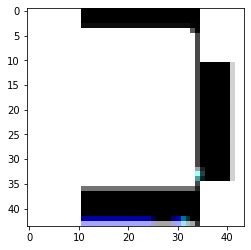

200 320
False


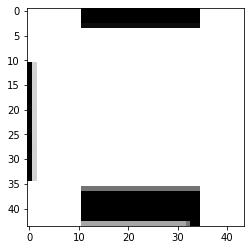

200 360
True


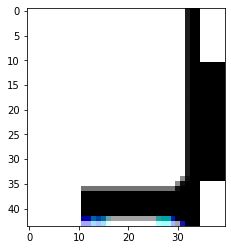

240 0
True


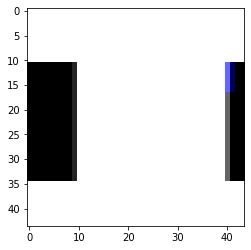

240 40
False


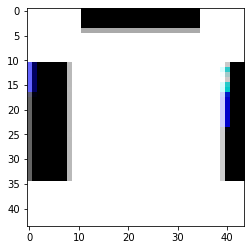

240 80
True


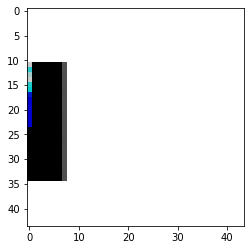

240 120
True


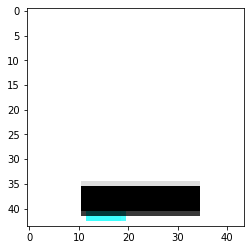

240 160
False


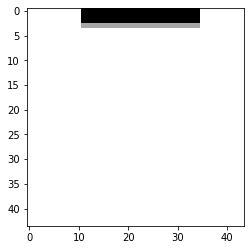

240 200
True


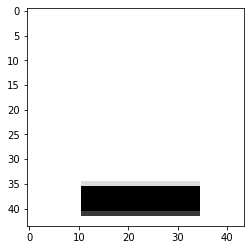

240 240
False


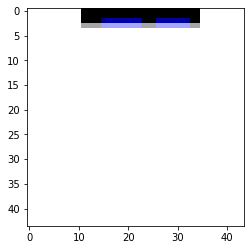

240 280
False


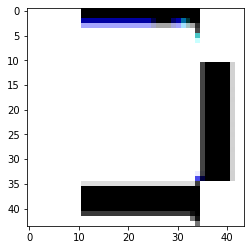

240 320
False


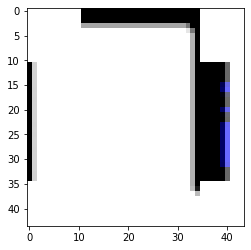

240 360
False


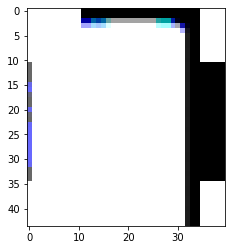

280 0
True


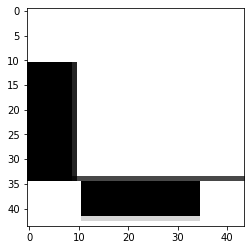

280 40
True


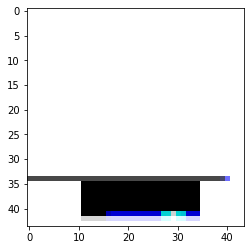

280 80
True


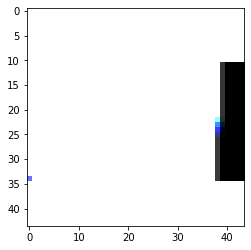

280 120
False


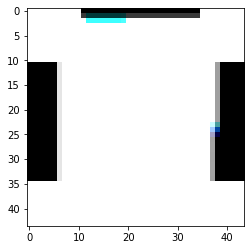

280 160
True


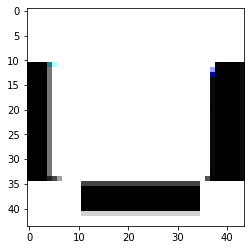

280 200
False


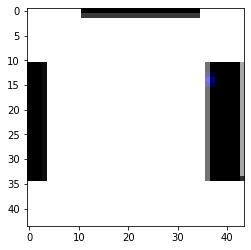

280 240
True


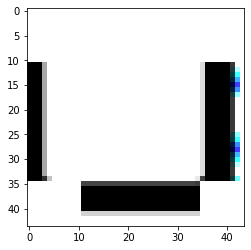

280 280
False


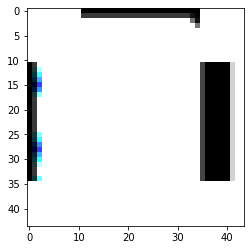

280 320
True


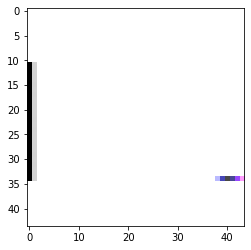

280 360
True


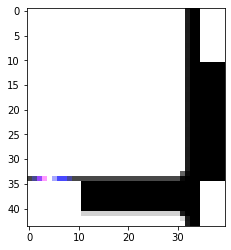

320 0
False


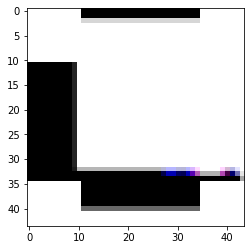

320 40
False


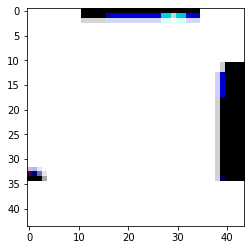

320 80
True


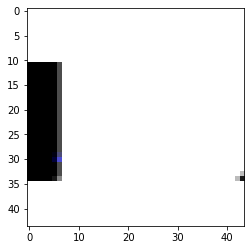

320 120
True


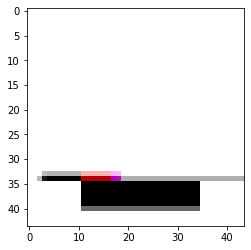

320 160
False


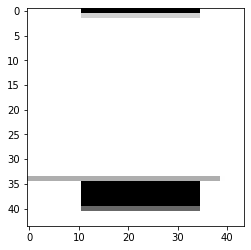

320 200
True


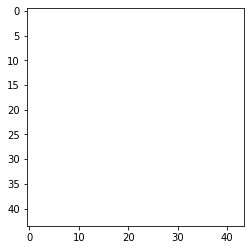

320 240
False


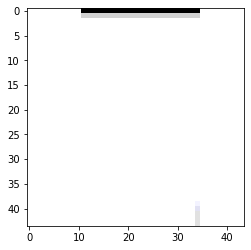

320 280
True


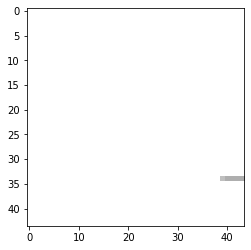

320 320
True


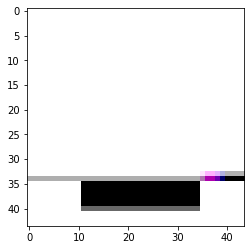

320 360
False


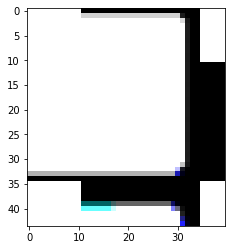

360 0
True


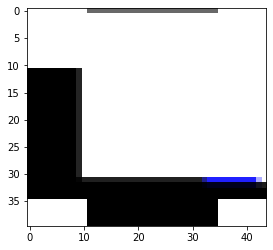

360 40
True


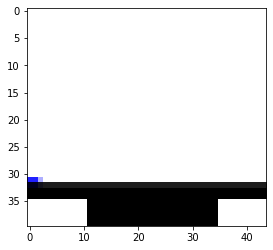

360 80
True


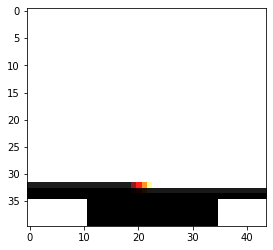

360 120
True


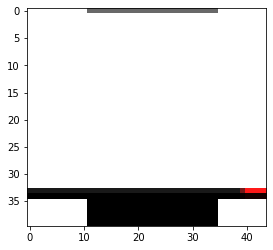

360 160
True


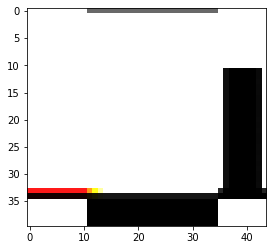

360 200
True


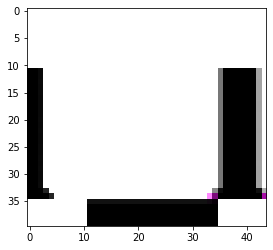

360 240
True


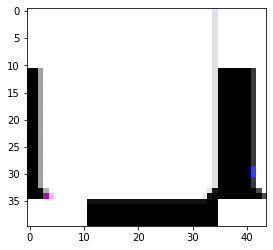

360 280
True


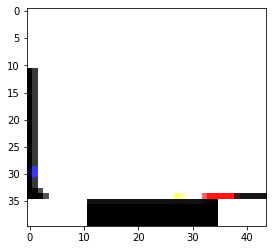

360 320
True


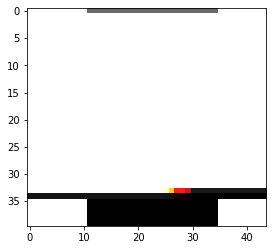

360 360
True


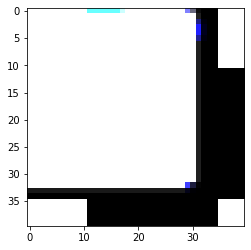

In [28]:
#for i in range(0,400,40):
for i in range(0,resized_image.shape[1],iincrement):

    for j in range(0,resized_image.shape[0],jincrement):
        img_temp = resized_image[i:i+44,j:j+44]
        size = 40
        print(i,j)
        print(img_temp[0,int(size/2)].all())
        '''up    = (not bool(img_temp[0,int(size/2)].all()))*(2^1)
        down  =  (not bool(img_temp[int(size-1),int(size/2)].all()))*(2^3)
        left  = (not bool(img_temp[int(size/2),0].all()))*(2^0)
        right = (not bool(img_temp[int(size/2),int(size-1)].all()))*(2^2)
        print(f"up = {up} down = {down} left = {left} right ={right}")
        sumq = up+down+left+right
        print(f"sumq = {sumq}")'''
        
        
        
        img_tmp = cv.rectangle(img_temp,(0,0),(10,10),[255,255,255],-1)
        img_tmp = cv.rectangle(img_temp,(35,0),(44,10),[255,255,255],-1)

        img_tmp = cv.rectangle(img_temp,(0,35),(10,45),[255,255,255],-1)

        img_tmp = cv.rectangle(img_temp,(35,35),(44,44),[255,255,255],-1)

        
        
        plt.imshow(img_temp)
        plt.show()